In [3]:
'''
A notebook which allows a pretrained detector to be applied to 
any audio file.
'''
%load_ext autoreload
%autoreload 2
%matplotlib inline

# General imports
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import yaml
import cPickle as pickle
from scipy.ndimage.interpolation import zoom

# Neural network imports
import nolearn
import lasagne

# Custom functions and classes
sys.path.append('..')
from lib import train_helpers

# Wav file loading and manipulation
import librosa
from librosa.feature import melspectrogram

Using gpu device 0: GeForce GTX 770 (CNMeM is disabled, cuDNN 5110)
/home/michael/anaconda/lib/python2.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")
/home/michael/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


## Testing options

In [9]:
# You can provide here either:
#   A path to a single .wav file, 
# or
#   A path to a folder which contains one or more .wav files
#
# In this example code, we give a folder which contains a single .wav file.
# We could also give the complete path to this file - the result would be the same
# test_file_or_folder = '/home/michael/Dropbox/FairbrassFirmanetal_/models/example_test_data/'
# test_file_or_folder = '/media/michael/Engage/data/audio/alison_data/diversity_labelled_data/'
# test_file_or_folder = '/media/michael/Engage/data/audio/alison_data/golden_set/wavs/'
test_file_or_folder = '/media/michael/Elements/Fieldwork_Data/2013/CR0_5EF/SM2+/'

# specify where the pretrained model is that we want to load
models_dir = '/media/michael/Engage/data/audio/alison_data/golden_set/predictions/ensemble_train_anthrop/0/anthrop/'

# Specify the names of the files we want to load in
# (Keep as they are to load in the model in the dropbox folder)
weights_path = os.path.join(models_dir, 'results/weights_99.pkl')
options_path = os.path.join(models_dir, 'network_opts.yaml')

In [10]:
# Loading the options for network architecture, spectrogram type etc
#options = yaml.load(open(options_path))
sys.path.append('../training')
__import__('04_predict')

# Checking the weights exist
assert os.path.exists(weights_path), 'Error - cannot find the weights file at ' + weights_path

## Finding the .wav files to test on

In [11]:
if os.path.isdir(test_file_or_folder):
    
    # User provided a folder - we must get the list of wav files
    wav_dir = test_file_or_folder
    filenames = [xx for xx in os.listdir(wav_dir) if xx.endswith('.wav')]
    assert len(filenames), 'Error - no files found!'

elif os.path.isfile(test_file_or_folder):
    
    # User provided a file - we must deal with the filename appropriately
    wav_dir = os.path.dirname(test_file_or_folder)
    filenames = [os.path.basename(test_file_or_folder)]

else:
    raise Exception("No such file or folder: ", test_file_or_folder)
    
print "We will load %d file(s) from the folder:" % len(filenames)
print wav_dir
print 
print "Files are:"
for filename in filenames:
    print "  -", filename

We will load 326 file(s) from the folder:
/media/michael/Elements/Fieldwork_Data/2013/CR0_5EF/SM2+/

Files are:
  - CR05EF-13527_20130919_133000.wav
  - CR05EF-13527_20130915_180000.wav
  - CR05EF-13527_20130915_183000.wav
  - CR05EF-13527_20130915_190000.wav
  - CR05EF-13527_20130915_193000.wav
  - CR05EF-13527_20130915_200000.wav
  - CR05EF-13527_20130915_203000.wav
  - CR05EF-13527_20130915_210000.wav
  - CR05EF-13527_20130915_213000.wav
  - CR05EF-13527_20130915_220000.wav
  - CR05EF-13527_20130915_223000.wav
  - CR05EF-13527_20130915_230000.wav
  - CR05EF-13527_20130915_233000.wav
  - CR05EF-13527_20130916_000000.wav
  - CR05EF-13527_20130916_003000.wav
  - CR05EF-13527_20130916_010000.wav
  - CR05EF-13527_20130916_020000.wav
  - CR05EF-13527_20130916_023000.wav
  - CR05EF-13527_20130916_030000.wav
  - CR05EF-13527_20130916_033000.wav
  - CR05EF-13527_20130916_040000.wav
  - CR05EF-13527_20130916_043000.wav
  - CR05EF-13527_20130916_050000.wav
  - CR05EF-13527_20130916_053000.wav


## Setting up network

In [12]:
import classifier

In [13]:
model = classifier.Classifier()

TODO - Remove the height thing...
32


In [17]:
# pred = model.load_and_classify(wav_dir + filenames[0])
model.load_wav(wav_dir + filenames[0], loadmethod='wavfile')
# with open('/tmp/tmpwav.pkl', 'w') as f:
#     pickle.dump(model.wav, f, -1)
# model.wav = pickle.load(open('/tmp/tmpwav.pkl'))
# model.sample_rate = 22050

/home/michael/anaconda/lib/python2.7/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [18]:
model.compute_spec()

In [51]:
pred = model.classify()
print len(pred)
sds

Took 0.754659s to classify
3480


NameError: name 'sds' is not defined

In [21]:
sshape = model.spec.shape[1]
wshape = model.wav.shape[0]
len_in_s = wshape / 22050.0
print len_in_s
s_sr = sshape / float(len_in_s)
print s_sr
labels = np.diff(np.round(np.arange(1000) / s_sr))
print labels
print np.diff(np.where(labels)[0])

1740.00471655
21.5332749639
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0

In [114]:
model.wav.shape[0] / model.sample_rate

1740

# Timings to load wav files

60s to load one wav file


In [29]:
import librosa
from librosa.feature import melspectrogram

In [30]:
from time import time
wavpath = wav_dir + filenames[0]

In [46]:
tic = time()
librosa_wav, librosa_sr = librosa.load(wavpath, 22050)
print time() - tic

50.9407241344


In [85]:
#from wave import Wave_read
from scipy.io import wavfile
tic = time()
wavfile_sr, wavfile_wav = wavfile.read(open(wavpath))
print time() - tic

wavfile_wav = wavfile_wav / 32768.0

0.108930826187


In [86]:
print wavfile_wav.dtype, librosa_wav.dtype

float64 float32


In [87]:
2**15

32768

0.999405838368


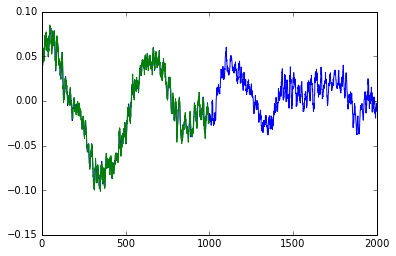

In [89]:
# import wavea

# w = wave.open(wavpath)
# w.readframes(-1)
print float(wavfile_wav.max()) / librosa_wav.max()
plt.plot(librosa_wav[:2000])
plt.plot(wavfile_wav[:2000:2])

# Timings to compute specs

In [102]:
from easydict import EasyDict as edict

N_FFT = 2048
HOP_LENGTH = 1024 # 512
N_MELS = 32 # 128

# specify where the pretrained model is that we want to load
models_dir = '/media/michael/Engage/data/audio/alison_data/golden_set/predictions/ensemble_train_tmp/0/anthrop/'
options_path = os.path.join(models_dir, 'network_params.yaml')
opts = edict(yaml.load(open(options_path)))


specs = {}
for name, wav, sr in [('librosa', librosa_wav, librosa_sr), ('wavfile', wavfile_wav, wavfile_sr)]:
    tic = time()
    _N_FFT = N_FFT# * (sr / librosa_sr)
    _HOP_LENGTH = HOP_LENGTH# * (sr / librosa_sr)
    _wav = wav.copy()
    _wav = _wav if name == 'librosa' else _wav[::2]
    _sr = sr if name == 'librosa' else sr / 2
    
    spec = melspectrogram(_wav, sr=_sr, n_fft=_N_FFT,
                          hop_length=_HOP_LENGTH, n_mels=N_MELS)
    # Do log conversion:
    spec = np.log(opts.A + opts.B * spec)
    spec -= np.median(spec, axis=1, keepdims=True)
    spec = spec.astype(np.float32)
    specs[name] = spec
    print spec.shape
    print time() - tic

(32, 37468)
1.78744792938
(32, 37468)
1.9595489502


(32, 37468)
(32, 37468)
4.7278


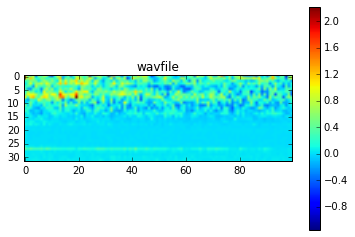

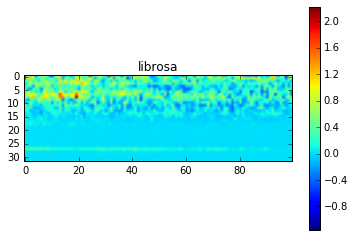

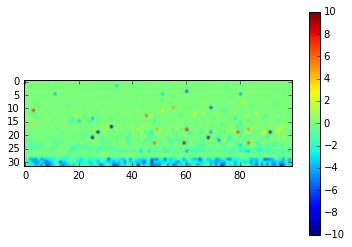

In [111]:
for name, spec in specs.items():
    
    print spec.shape
    
    plt.figure()
    plt.imshow(spec[:, :100])
    plt.title(name)
    plt.colorbar()
plt.figure()
error = (specs['librosa'] - specs['wavfile']) / specs['librosa']
print np.abs(error).mean()
plt.imshow(error[:, :100])
plt.clim(-10, 10)
plt.colorbar()

0.000195483


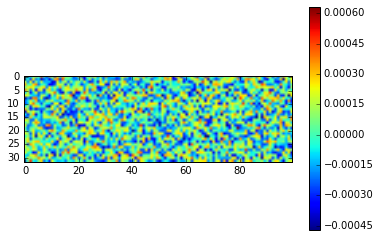

In [118]:
error = (specs['librosa'] - specs['librosa'].astype(np.float16)) / specs['librosa']
print np.abs(error).mean()
plt.imshow(error[:, :100])
# plt.clim(-0.1, 0.1)
plt.colorbar()

# Is it worth saving the spectrograms?

In [157]:
tic = time()

wavpath = '/media/michael/Elements1/Fieldwork_Data/2015/BR4/SM2+/BR4-013378_20150818_110000.wav'
wavfile_sr, wavfile_wav = wavfile.read(open(wavpath))
spec = melspectrogram(_wav, sr=_sr, n_fft=_N_FFT,
                          hop_length=_HOP_LENGTH, n_mels=N_MELS)
# Do log conversion:
spec = np.log(opts.A + opts.B * spec)
spec -= np.median(spec, axis=1, keepdims=True)
spec = spec.astype(np.float16)
print "Time to fresh compute specs is", time() - tic

reps = 50
print "\nPICKLE\n"

tic = time()
for _ in range(reps):
    with open('/tmp/tmpspec.pkl', 'w') as f:
        pickle.dump(spec, f, -1)
print "Time to save specs to SSD is", time() - tic

tic = time()
for _ in range(reps):
    with open('/media/michael/Engage/tmpspec.pkl', 'w') as f:
        pickle.dump(spec, f, -1)
print "Time to save specs to HDDD is", time() - tic

tic = time()
for _ in range(reps):
    pickle.load(open('/tmp/tmpspec.pkl')).astype(np.float32)
print "Time to load specs from SSD is", time() - tic

tic = time()
for _ in range(reps):
    pickle.load(open('/media/michael/Engage/tmpspec.pkl')).astype(np.float32)
print "Time to load specs from HDD is", time() - tic


print "\nNumpy\n"

tic = time()
for _ in range(reps):
    with open('/tmp/tmpspec.npy', 'w') as f:
        np.save(f, spec)
print "Time to save specs to SSD is", time() - tic

tic = time()
for _ in range(reps):
    with open('/media/michael/Engage/tmpspec.npy', 'w') as f:
        np.save(f, spec)
print "Time to save specs to HDDD is", time() - tic

tic = time()
for _ in range(reps):
    np.load(open('/tmp/tmpspec.npy')).astype(np.float32)
print "Time to load specs from SSD is", time() - tic

tic = time()
for _ in range(reps):
    np.load(open('/media/michael/Engage/tmpspec.npy')).astype(np.float32)
print "Time to load specs from HDD is", time() - tic

Time to fresh compute specs is 3.46127581596

PICKLE

Time to save specs to SSD is 0.542908906937
Time to save specs to HDDD is 2.00380897522
Time to load specs from SSD is 0.23347902298
Time to load specs from HDD is 0.21334195137

Numpy

Time to save specs to SSD is 0.524817228317
Time to save specs to HDDD is 1.88063192368
Time to load specs from SSD is 0.209056138992
Time to load specs from HDD is 0.204697132111


In [158]:

print "\nNumpy compressed\n"

tic = time()
for _ in range(reps):
    with open('/tmp/tmpspec.npz', 'w') as f:
        np.savez_compressed(f, spec)
print "Time to save specs to SSD is", time() - tic

tic = time()
for _ in range(reps):
    with open('/media/michael/Engage/tmpspec.npz', 'w') as f:
        np.savez_compressed(f, spec)
print "Time to save specs to HDDD is", time() - tic

tic = time()
for _ in range(reps):
    tmp = np.load(open('/tmp/tmpspec.npz'))
    tmp.f.arr_0.astype(np.float32)
print "Time to load specs from SSD is", time() - tic

tic = time()
for _ in range(reps):
    tmp = np.load(open('/media/michael/Engage/tmpspec.npz'))
    tmp.f.arr_0.astype(np.float32)
print "Time to load specs from HDD is", time() - tic



Numpy compressed

Time to save specs to SSD is 5.21797299385
Time to save specs to HDDD is 5.35493302345
Time to load specs from SSD is 0.878879070282
Time to load specs from HDD is 0.871598005295


In [155]:
with open('/tmp/tmpspec.npz', 'rb') as f:
    A = np.load(f)
    print A.f.arr_0.shape

(32, 37468)


In [151]:
A

Answer: YES

# Do I need to retrain the models to cope with these new specs?

In [189]:
pred = {}
wavpath = '/media/michael/Elements1/Fieldwork_Data/2015/BR4/SM2+/BR4-013378_20150818_110000.wav'
models = []

for loadmethod in ['wavfile', 'librosa']:
    model = classifier.Classifier()
    model.load_wav(wavpath, loadmethod)
    print model.wav.max()
    model.compute_spec()
    pred[loadmethod] = model.classify()
    models.append(model)

TODO - Remove the height thing...
32
Took 0.559564s to load wav
(38367104,)
(38367104,)
0.654876708984
(32, 37468)
Took 3.871083s to create spec
Took 7.864810s to classify
TODO - Remove the height thing...
32
Took 51.953377s to load wav
(38367104,)
(38367104,)
0.654348
(32, 37468)
Took 3.315617s to create spec
Took 7.963241s to classify


In [190]:
print pred['librosa'].shape
print pred['wavfile'].shape

(37468, 2)
(37468, 2)


In [191]:
p0 = pred['librosa'][:, 0]
p1 = pred['wavfile'][:, 0]


In [192]:
print p0.mean(), p1.mean()

0.577154 0.577657


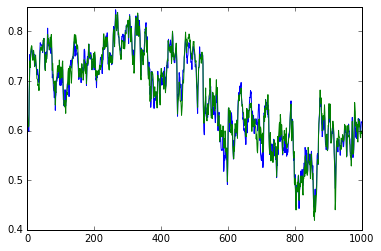

In [193]:
plt.plot(p0[:1000])
plt.plot(p1[:1000])

(0, 1)

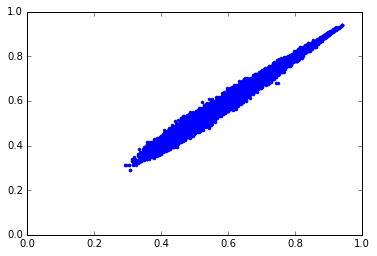

In [200]:
plt.plot(p0, p1, '.')
plt.xlim(0, 1)
plt.ylim(0, 1)

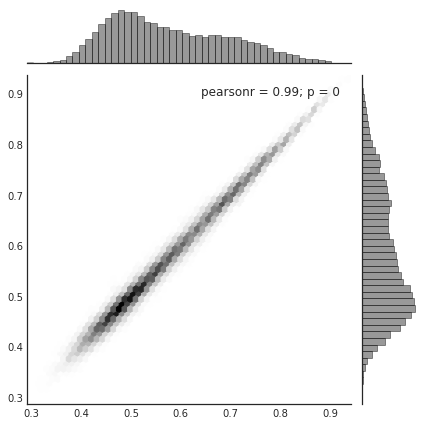

In [199]:
import seaborn as sns
with sns.axes_style("white"):
    sns.jointplot(x=p0, y=p1, kind="hex", color="k");

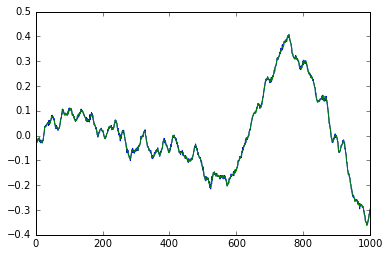

In [195]:
plt.plot(models[0].wav[:1000])
plt.plot(models[1].wav[:1000])

(32, 37468)
(64, 100)


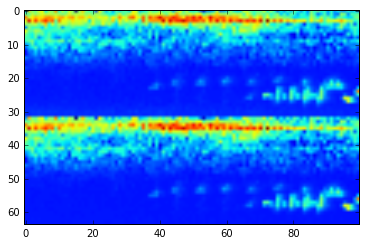

In [196]:
print models[0].spec.shape
S = np.vstack((models[0].spec[:, :100], models[1].spec[:, :100]))
print S.shape
plt.imshow(S, interpolation=None)

In [188]:
for model in models:
    print model.sample_rate

44100
22050
